# Inaugural Project

> **Note the following:** 
> 1. The `inauguralproject.py` file includes a definitions of functions which is used multiple times in this notebook.

Imports and set magics:

In [20]:
# Import modules
import numpy as np
from types import SimpleNamespace
from scipy import optimize 
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes.
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import ExchangeEconomyClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

I use the utility functions defined in the py-file, and set up a for-loop with conditions for pareto improvements of the initial endowment.

In [34]:
# Call the model from the py-file
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

# Create the set C
N = 75
list_C = [i/N for i in range(N+1)]

# Create empty lists for the results
list_x1A = []
list_x2A = []

# Set up conditions for pareto improvements and append the pareto approvements to the empty lists
for x1A in list_C:
    for x2A in list_C:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A,x2A)>=model.utility_A(par.w1A,par.w2A) and model.utility_B(x1B,x2B)>=model.utility_B(par.w1B,par.w2B):
            list_x1A.append(x1A)
            list_x2A.append(x2A)


pareto_improvements = list_x1A , list_x2A
print('Pareto-improvements are:',pareto_improvements)


Pareto-improvements are: ([0.08, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.10666666666666667, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.14666666666666667, 0.14666666666666667, 0.14666666666666667, 0.14666666666666667, 0.14666666666666667, 0.14666666666666667, 0.14666666666666667, 0

The for-loop creates a list of pareto improvements. I plot the pareto improvement below with blue circles. The initial endowment is shown by the black square.

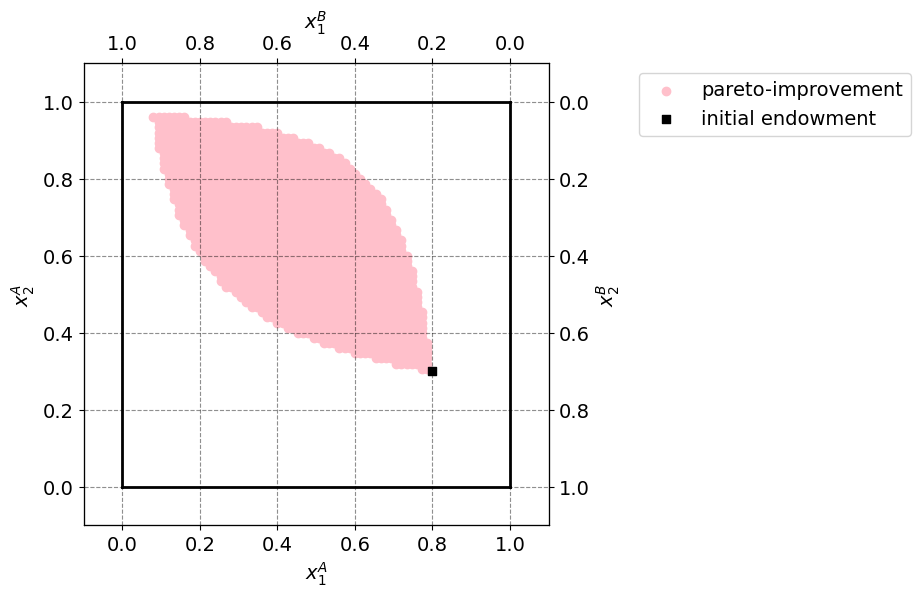

In [35]:
par = model.par

# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot the possible pareto-improvements
ax_A.scatter(list_x1A,list_x2A,marker='o',color='pink',label='pareto-improvement')
# Plot the initial endowment
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='initial endowment')


# Limits for the figure
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

# Question 2

I create a list that p1 should be part of and use a for-loop on the check_market_clearing function from the py-file to print the market errors for given prices of p1.

For price 0.500 the errors are 0.533, -0.267
For price 0.527 the errors are 0.476, -0.251
For price 0.553 the errors are 0.424, -0.235
For price 0.580 the errors are 0.377, -0.219
For price 0.607 the errors are 0.334, -0.203
For price 0.633 the errors are 0.295, -0.187
For price 0.660 the errors are 0.259, -0.171
For price 0.687 the errors are 0.225, -0.155
For price 0.713 the errors are 0.194, -0.139
For price 0.740 the errors are 0.166, -0.123
For price 0.767 the errors are 0.139, -0.107
For price 0.793 the errors are 0.114, -0.091
For price 0.820 the errors are 0.091, -0.075
For price 0.847 the errors are 0.069, -0.059
For price 0.873 the errors are 0.049, -0.043
For price 0.900 the errors are 0.030, -0.027
For price 0.927 the errors are 0.012, -0.011
For price 0.953 the errors are -0.006, 0.005
For price 0.980 the errors are -0.022, 0.021
For price 1.007 the errors are -0.037, 0.037
For price 1.033 the errors are -0.052, 0.053
For price 1.060 the errors are -0.065, 0.069
For price 

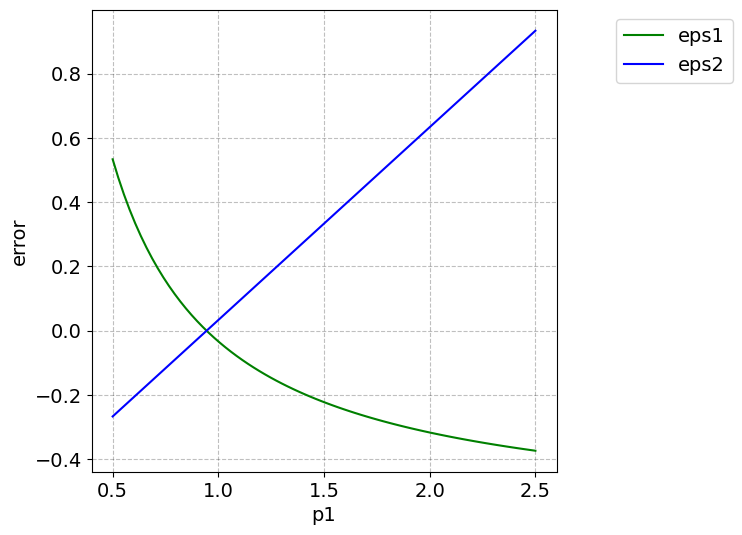

In [66]:
# Create discrete list for p1
N = 75
p_1 = [0.5+2*i/N for i in range(N+1)]


# Call the model from the py-file
model = ExchangeEconomyClass()
model.check_market_clearing

# Empty list for the errors
list_error1 = []
list_error2 = []

# Solve check_market_clearing-model in py-file to find errors
for p1 in p_1:
    error = model.check_market_clearing(p1)
    print(f'For price {p1:.3f} the errors are {error[0]:.3f}, {error[1]:.3f}')
    list_error1.append(error[0])
    list_error2.append(error[1])

fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
plt.plot(p_1, list_error1, color='green', label='eps1')
plt.plot(p_1, list_error2, color='blue', label='eps2')
plt.xlabel('p1')
plt.ylabel('error')
plt.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.4,1.0))
plt.show()

From the print, it is clear that there is a root where eps1 changes from a positive number to a negtive number, and eps2 changes from a negative number to a positive number. The market clearing price for p1 is then between 0,9267 and 0,9534

# Question 3

I use the optimizer to find the market clearing price, by searching for the root of eps1. 

In [60]:

# Define an objective function (to find root)
def obj(p1):
    return model.check_market_clearing(p1)[0]

# The function optimize.root will solve objective = 0 starting from x0 = 1, which is the guess of the price of p1
res = optimize.root(fun = obj, x0 = 1)

# Print the market clearing price
print(f'The market clearing price: {res.x[0]:.3f}')

The market clearing price: 0.944


The market clearing price is p1 = 0.944 when p2 = 1 (set as numeraire).
The walras law states that market clearing in n-1 markets also insures market clearing in the last market. 

# Question 4a

In [ ]:
# Call the model from the py-file
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

# define objective function to minimize the negative utility function to find maximum utility for consumer A
def max_utility_A(p1):
    objective = lambda x1B, x2B: -model.utility_A(1 - x1B, 1 - x2B)  
    result = minimize(objective, bounds=(0, 1), method='bounded', x0=0)
    xA = result.x
    xB = 1 - xA
    return p1, xA, xB

# Find allocation for given price range
allocations_p_1 = [max_utility_A(p1) for p1 in p_1]
print("Allocations with prices in P1:", allocations_p_1)


In [ ]:
# Call the model from the py-file
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

# Define objective function to maximize Consumer A's utility
def objective(x):
    return -model.utility_A(x[0],x[1])

# Initial guess for allocation
initial_x = [0 , 0]

# Bounds for allocation
bounds = ((0, 1) , (0, 1))

# Solve the optimization problem
result = minimize(objective, initial_x, bounds=bounds, method='SLSQP')

# Optimal allocation
optimal_allocation = result.x
optimal_prices_str = ', '.join([f'{p:.2f}' for p in optimal_prices])

print("Optimal prices:", optimal_prices_str)


# Question 4b

In [ ]:
# Call the model from the py-file
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

# Define objective function to maximize Consumer A's utility
def objective(x):
    return -model.utility_A(x[0],x[1])

# Initial guess for allocation
initial_x = [0 , 0]

# Bounds for allocation
bounds = ((0, 1) , (0, 1))

# Solve the optimization problem
result = minimize(objective, initial_x, bounds=bounds, method='SLSQP')

# Optimal allocation
optimal_allocation = result.x


# Question 5a

# Question 5b

In [ ]:
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

def objective(x):
    x1A, x2A = x
    return - model.utility_A(x)

def cons(x):
    x1B , x2B = x
    w1B , w2B = w
    return model.utility_B(x) - model.utility_B(w)

cons = {}

# Bounds for x
bounds = ()


# Solve the optimization problem
result = minimize(objective, initial_prices, bounds=bounds, method='SLSQP', constraints={'type': 'eq', 'fun': lambda p1: -model.check_market_clearing(p1)})


# Question 6a

In [ ]:
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

def max_utility(x1A, x2A, x1B, x2B):
    return - model.utility_A(x1A, x2A)-model.utility_B(x1B, x2B)

# Initial guess for allocation
initial_x = [0 , 0 , 0 ,0]

# Bounds for allocation
bounds = ((0, 1) , (0, 1) , (0,1) , (0,1))

# Solve the optimization problem
result = minimize(max_utility, initial_x, bounds=bounds, method='SLSQP')


# Question 6b

# Question 7

(array([0.65451374, 0.29728338, 0.52388708, 0.5144319 , 0.67416737,
       0.10163702, 0.74463003, 0.06117886, 0.04711474, 0.09895012,
       0.39248525, 0.18000174, 0.48507722, 0.71825949, 0.32580512,
       0.38175792, 0.56199034, 0.32145468, 0.98152931, 0.93500314,
       0.64714555, 0.50301998, 0.4528117 , 0.2292778 , 0.19252969,
       0.02350668, 0.66887265, 0.23210475, 0.81325036, 0.67060078,
       0.68300275, 0.53709201, 0.93985523, 0.01398846, 0.87362607,
       0.0171735 , 0.60251523, 0.51971882, 0.6802674 , 0.13375208,
       0.89675588, 0.77380665, 0.90701137, 0.63609871, 0.44502739,
       0.31644807, 0.39758192, 0.18198821, 0.15694648, 0.58077533]), array([0.84061911, 0.07691363, 0.47372711, 0.63631574, 0.72014184,
       0.70907713, 0.41564201, 0.04000412, 0.51017826, 0.18182858,
       0.25035681, 0.85066442, 0.99367584, 0.55357818, 0.78876332,
       0.65336667, 0.37068241, 0.11641866, 0.92709044, 0.43946724,
       0.28086536, 0.63864024, 0.33406809, 0.24050947, 0.75

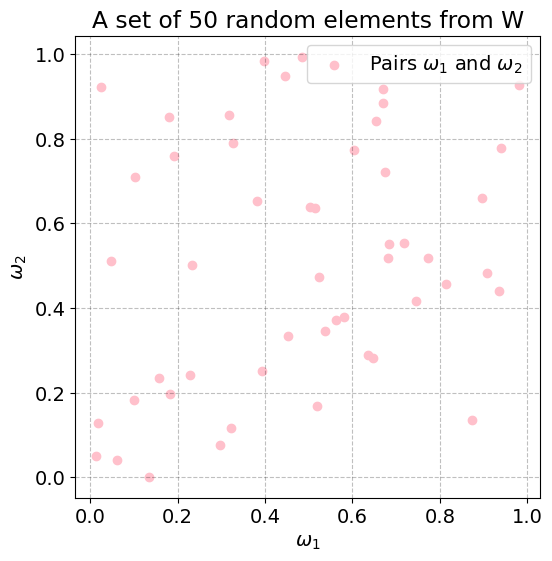

In [58]:
np.random.seed(2002)

# Defining the function W with the two elements with a uniform distribution 
w_1_A = np.random.uniform(0 , 1, 50) 
w_2_A = np.random.uniform(0 , 1, 50)  

W = w_1_A , w_2_A
print(W)

# Display the 50 elements in a scatterplot
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
plt.title('A set of 50 random elements from W')
plt.scatter(w_1_A, w_2_A, color='pink', marker='o', label='Pairs $\omega_1$ and $\omega_2$')
plt.xlabel('$\omega_1$')
plt.ylabel('$\omega_2$')
plt.grid(True)
plt.legend()
plt.show()


# Question 8

In [ ]:
for w_1_A in list_1:

The project shows the Walras exchange economy. 